In [1]:
import pandas as pd
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import random
import pickle as pkl

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

In [5]:
adata = ad.read_h5ad("../../data/sciplex_qc_ann.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 401917 × 27544
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'SMILES', 'fmfp', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'drug_celltype_dose', 'match_index'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

## Random gene subset

In [11]:
def save_adata_random(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    
    genes_random = random.sample(list(adata.var_names), n_genes)
    adata = adata[:, adata.var_names.isin(genes_random)].copy()
    adata.write_h5ad(adata_out_path)

In [12]:
save_adata_random("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_rand.h5ad")

## HVG - Seurat

In [17]:
def save_adata_hvg_seurat(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=n_genes)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [18]:
save_adata_hvg_seurat("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_seurat.h5ad")

## HVG - Seurat V3

In [21]:
def save_adata_hvg_seurat_v3(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=n_genes)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [22]:
save_adata_hvg_seurat_v3("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_seurat_v3.h5ad")

## HVG - Cell Ranger

In [26]:
def save_adata_hvg_cellranger(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=n_genes)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [27]:
save_adata_hvg_cellranger("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_cellranger.h5ad")

## Plots

In [2]:
adata_rand = ad.read_h5ad("../../data/feature_selection/sciplex_rand.h5ad")
adata_seurat = ad.read_h5ad("../../data/feature_selection/sciplex_seurat.h5ad")
adata_seuratv3 = ad.read_h5ad("../../data/feature_selection/sciplex_seurat_v3.h5ad")
adata_cellranger = ad.read_h5ad("../../data/feature_selection/sciplex_cellranger.h5ad")

In [3]:
# Convert to sets
genes_rand = set(list(adata_rand.var_names))
genes_seurat = set(list(adata_seurat.var_names))
genes_seuratv3 = set(list(adata_seuratv3.var_names))
genes_cellranger = set(list(adata_cellranger.var_names))

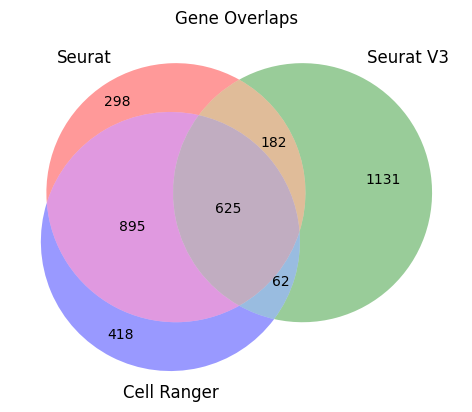

In [4]:
# Create the Venn diagram
venn3([genes_seurat, genes_seuratv3, genes_cellranger], ('Seurat', 'Seurat V3', 'Cell Ranger'))
plt.title("Gene Overlaps")
plt.show()

In [16]:
genes_rand = list(adata_rand.var_names)
genes_seurat = list(adata_seurat.var_names)
genes_seuratv3 = list(adata_seuratv3.var_names)
genes_cellranger = list(adata_cellranger.var_names)

In [18]:
from tqdm import tqdm

i=0
j=0
k=0
for gene in tqdm(genes_rand):
    if gene in genes_seurat:
        i+=1
    if gene in genes_seuratv3:
        j+=1
    if gene in genes_cellranger:
        k+=1

print("Genes common from random subset with seurat:", i)

print("Genes common from random subset with seuratv3:", j)

print("Genes common from random subset with cellranger:", k)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 48862.45it/s]

Genes common from random subset with seurat: 160
Genes common from random subset with seuratv3: 128
Genes common from random subset with cellranger: 158


In [49]:
def plot_mean_kde():
    plt.figure(figsize=(10, 6))
    
    methods = {
        "Random": adata_rand,
        "Seurat": adata_seurat,
        "Seurat_v3": adata_seuratv3,
        "CellRanger": adata_cellranger
    }

    data = []

    for method_name, adata in methods.items():
        X = adata.X.toarray()
        means = X.mean(axis=0)

        means = means[means < 0.2]
        
        for m in means:
            data.append({"Method": method_name, "Gene Mean": m})

    df = pd.DataFrame(data)
    
    # Plot KDE
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x="Gene Mean", hue="Method", common_norm=False, fill=True, alpha=0.4)
    plt.xlabel("Gene Mean Expression")
    plt.title("KDE Plot of Gene Means by HVG Selection Method")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

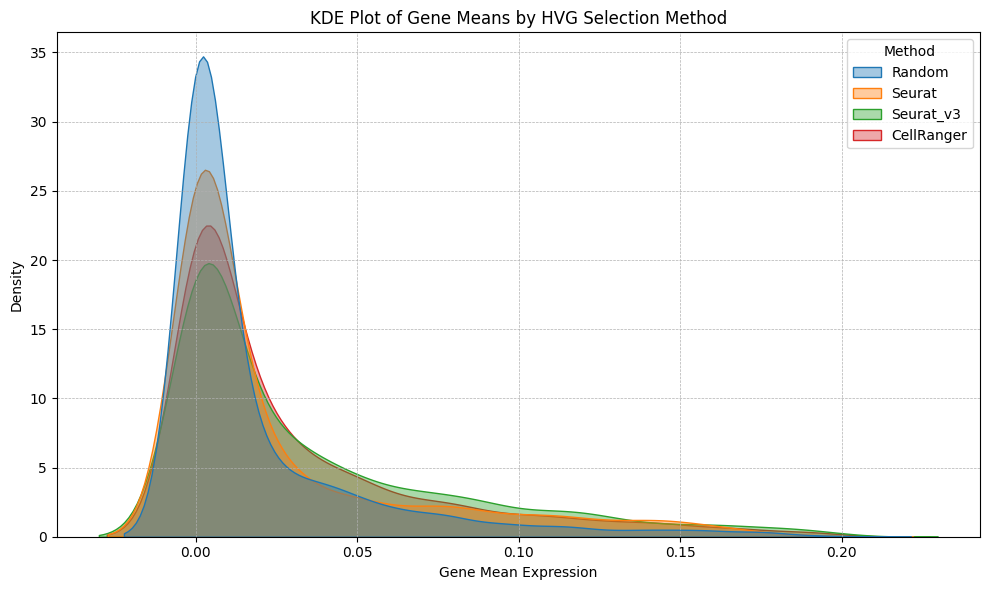

In [50]:
plot_mean_kde()

In [60]:
def plot_var_kde():
    plt.figure(figsize=(10, 6))
    
    methods = {
        "Random": adata_rand,
        "Seurat": adata_seurat,
        "Seurat_v3": adata_seuratv3,
        "CellRanger": adata_cellranger
    }

    data = []

    for method_name, adata in methods.items():
        X = adata.X.toarray()
        variances = X.var(axis=0)

        variances = variances[variances < 0.2]
        
        for v in variances:
            data.append({"Method": method_name, "Gene Variance": v})

        print(variances)

    df = pd.DataFrame(data)
    
    #plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x="Gene Variance", hue="Method", common_norm=False, fill=True, alpha=0.4)
    plt.xlabel("Gene Variance")
    plt.title("KDE Plot of Gene Variance by HVG Selection Method")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

[0.1142161  0.00820768 0.0001305  ... 0.00109921 0.00014844 0.00017844]
[0.0652383  0.1142161  0.01899306 ... 0.00874117 0.00052397 0.00017844]
[0.01899306 0.00283995 0.04334677 ... 0.00089184 0.01860505 0.00052397]
[0.0652383  0.1142161  0.04710408 ... 0.00874117 0.00052397 0.00017844]


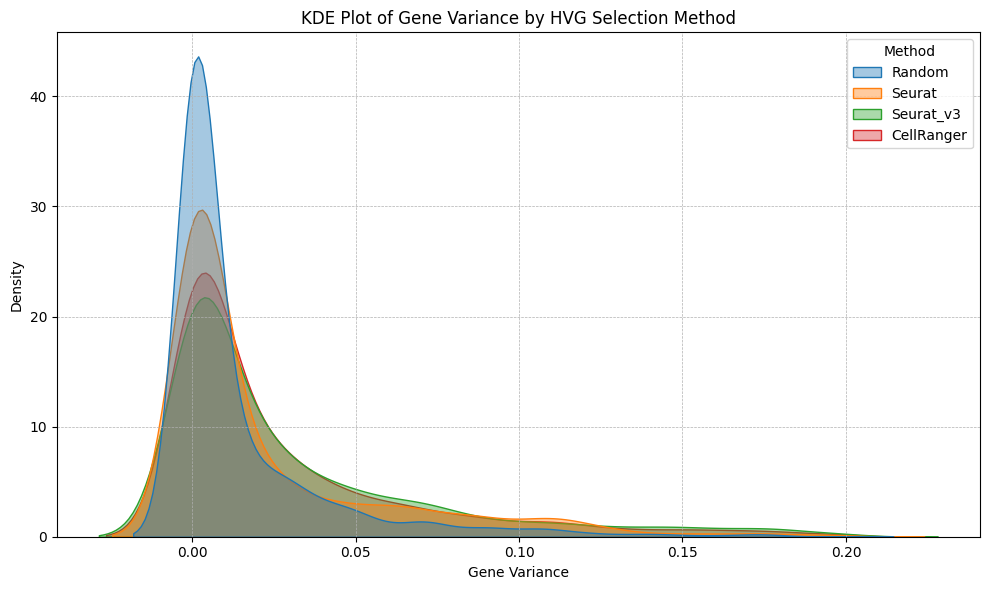

In [61]:
plot_var_kde()